In [5]:
import csv
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from graphviz import Source # for drawing decision tree
from IPython.display import SVG # for drawing decision tree
import numpy as np
import pandas
import random
import math

In [6]:
rawData = pandas.read_csv("data/doubleStrandRaw.csv", delimiter=',', skipinitialspace=True, warn_bad_lines=True, index_col=0) 
rawData = rawData.astype('bool') # convert to bools
foreground = rawData.loc[rawData['class'] == True].drop('class', axis = 1) # split into forground and backgorund
background = rawData.loc[rawData['class'] == False].drop('class', axis = 1)
# print(foreground.loc[foreground[rawData.columns[2]] == True])
print(rawData.shape)

(145, 3520)


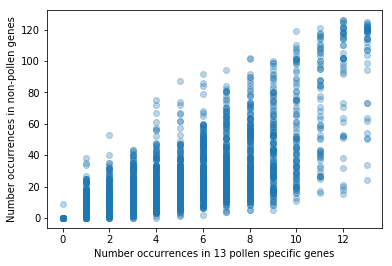

In [8]:

posCounts = foreground.sum(axis=0) #produces list of sum of occurances in foregorund for each column
negCounts = background.sum(axis=0)

# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
plt.scatter(posCounts, negCounts, alpha=0.3)
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)), alpha=0.3)
# plt.title("Pollen vs. Non-pollen Motif Occurances")
plt.xlabel("Number occurrences in 13 pollen specific genes")
plt.ylabel("Number occurrences in non-pollen genes")
plt.show()

In [4]:
n = len(foreground.columns)
posCoOccur = [0 for x in range(n*n)]
negCoOccur = [0 for x in range(n*n)]

for row in foreground.as_matrix():
    for first in range(n):
        if row[first]:
            for second in range(first+1,n):
                if row[second]:
                    posCoOccur[first*n+second] += 1                      

for row in background.as_matrix():
    for first in range(n):
        if row[first]:
            for second in range(first+1,n):
                if row[second]:
                    negCoOccur[first*n+second] += 1

KeyboardInterrupt: 

In [ ]:
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
# plt.scatter(posCoOccur, negCoOccur, alpha=0.02)
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCoOccur)), list(map(lambda x: x + random.random() -.5, negCoOccur)), alpha=0.01)
plt.title("Pollen vs. Non-pollen Motif Pair Occurances")
plt.xlabel("Number of Pollen co-occurrences")
plt.ylabel("Number of Non-Pollen co-occurrences")
plt.show()

In [28]:
print(rawData.columns[math.floor(9999/len(rawData.columns))], " and ", rawData.columns[9999%len(rawData.columns)]) # code for printing pairs of co-ocurring motifs

gimme_101_Improbizer_GTAGCTACGTTGGCTAA  and  DME_GAAGCCGAGGCAGAGC


In [39]:
never = []
neverMotifNames = []
mixed = []
mixedMotifNames = []
right = []
rightMotifNames = []
bottom = []
bottomMotifNames = []
ratio = []
ratioMotifNames = []
lasso = []
lassoMotifNames = []
welchList = []
welchListMotifNames = []

posCounts = foreground.sum(axis=0) #produces list of sum of occurances in foregorund for each column
# print(max(posCounts))
negCounts = background.sum(axis=0)
for col in range(len(posCounts)):
    if negCounts[col] == 0 and posCounts[col] == 0:
        neverMotifNames.append(rawData.columns[col])
    else:
        if posCounts[col] >= max(posCounts) - 1:
            rightMotifNames.append(rawData.columns[col])
        if negCounts[col] < 3:
            bottomMotifNames.append(rawData.columns[col])
        if posCounts[col] > 0 and negCounts[col] > 0:
            mixedMotifNames.append(rawData.columns[col])
        if (posCounts[col] / max(posCounts)) / (1+negCounts[col]/max(negCounts)) > .5:
            ratioMotifNames.append(rawData.columns[col])
#         if posCounts[col] >= 9 and negCounts[col] <= 20:
        if posCounts[col] >= 11 and negCounts[col] <= 30:
            welchListMotifNames.append(rawData.columns[col])
print(len(welchListMotifNames))

13


In [40]:
# def metrics(motifNames):
#     tp = 0
#     fn = 0
#     tn = 0
#     fp = 0
#     for motif in motifNames:
#         for
#         tp += foreground.loc[foreground[motif] == True].shape[0]
#         fn += foreground.loc[foreground[motif] == False].shape[0]
#         tn += background.loc[background[motif] == False].shape[0]
#         fp += background.loc[background[motif] == True].shape[0]
#     return tp,fn,tn,fp

In [41]:
# calculate and list metrics for all motifs with foreground >= 9 & background <= 20
print('true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative|motif name')

selected = welchListMotifNames
netTP = 0
netFP = 0
netTN = 0
netFN = 0
for motif in selected:
    tp = foreground.loc[foreground[motif] == True].shape[0]
    fn = foreground.loc[foreground[motif] == False].shape[0]
    tn = background.loc[background[motif] == False].shape[0]
    fp = background.loc[background[motif] == True].shape[0]
    netTP += tp
    netFP += fp
    netTN += tn
    netFN += fn
    if(tn+fp == 0):
        print(tp,"|", fp,"|", tn,"|", fn,"|",float(tp+tn)/float(tp+tn+fp+fn),"|",float(tp)/float(tp+fn),"|", " NA ","|", tp+fn,"|",motif)
    else:
        print(tp,"|", fp,"|", tn,"|", fn,"|",float(tp+tn)/float(tp+tn+fp+fn),"|",float(tp)/float(tp+fn),"|",float(tn)/float(tn+fp),"|", tp+fn,"|",motif)

print("AVERAGE / SUM METRICS:")
print('true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative')
if(netTN+netFP == 0):
    print(netTP,"|", netFP,"|", netTN,"|", netFN,"|",float(netTP+netTN)/float(netTP+netTN+netFP+netFN),"|",float(netTP)/float(netTP+netFN),"|"," NA ","|", netTP+netFN)
else:
    print(netTP,"|", netFP,"|", netTN,"|", netFN,"|",float(netTP+netTN)/float(netTP+netTN+netFP+netFN),"|",float(netTP)/float(netTP+netFN),"|",float(netTN)/float(netTN+netFP),"|", netTP+netFN)

true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative|motif name
11 | 16 | 116 | 2 | 0.8758620689655172 | 0.8461538461538461 | 0.8787878787878788 | 13 | gimme_143_MEME_4_w12
12 | 18 | 114 | 1 | 0.8689655172413793 | 0.9230769230769231 | 0.8636363636363636 | 13 | gimme_104_Improbizer_GTGCAACGGAGAGT
12 | 21 | 111 | 1 | 0.8482758620689655 | 0.9230769230769231 | 0.8409090909090909 | 13 | gimme_146_MEME_7_w12
11 | 27 | 105 | 2 | 0.8 | 0.8461538461538461 | 0.7954545454545454 | 13 | gimme_16_BioProspector_w12_1
11 | 17 | 115 | 2 | 0.8689655172413793 | 0.8461538461538461 | 0.8712121212121212 | 13 | gimme_13_BioProspector_w10_3
11 | 26 | 106 | 2 | 0.8068965517241379 | 0.8461538461538461 | 0.803030303030303 | 13 | gimme_92_MDmodule_Motif.12.3
12 | 15 | 117 | 1 | 0.8896551724137931 | 0.9230769230769231 | 0.8863636363636364 | 13 | gimme_132_MEME_3_w10
13 | 24 | 108 | 0 | 0.8344827586206897 | 1.0 | 0.8181818181818182 | 13 | gimm

In [32]:
truePositives = foreground.sum(axis=0)
falsePositives = background.sum(axis=0)

accuracyHeatData = []
sensitivityHeatData = []
specificityHeatData = []
for maxBackground in range(max(negCounts)):
    accuracyHeatDataRow = []
    sensitivityHeatDataRow = []
    specificityHeatDataRow = []
    for minForeground in range(max(posCounts)):
        motifList = []
        for motif in range(len(posCounts)):
            if minForeground <= posCounts[motif] and maxBackground >= negCounts[motif]:
                motifList.append(rawData.columns[motif]) #add name of motif
        if len(motifList) > 0:
            tp = 0
            tn = 0
            fp = 0
            fn = 0
            for motif in motifList:
                tp += truePositives[motif]
                fn += len(foreground) - truePositives[motif] # number of foreground - tp
                fp += falsePositives[motif]
                tn += len(background) - falsePositives[motif] # number of background - fp
            accuracyHeatDataRow.append(float(tp+tn)/float(tp+tn+fp+fn))
            sensitivityHeatDataRow.append(float(tp)/float(tp+fn))
            specificityHeatDataRow.append(float(tn)/float(tn+fp))
        else:
            accuracyHeatDataRow.append(0)
            sensitivityHeatDataRow.append(0)
            specificityHeatDataRow.append(0)
    accuracyHeatData.append(accuracyHeatDataRow)
    sensitivityHeatData.append(sensitivityHeatDataRow)
    specificityHeatData.append(specificityHeatDataRow)

KeyboardInterrupt: 

In [ ]:
img = plt.imshow(np.array(accuracyHeatData),interpolation='nearest')

plt.colorbar() # make a color bar
plt.axis('auto')
plt.gca().invert_yaxis()
plt.title("Accuracy of majority vote with constraints x and y")
plt.xlabel("Minimum number of Positive occurrences")
plt.ylabel("Maximum number of negative occurrences")
plt.show()

In [ ]:
img = plt.imshow(np.array(sensitivityHeatData),interpolation='nearest')

plt.colorbar() # make a color bar
plt.axis('auto')
plt.gca().invert_yaxis()
plt.title("Sensitivity of majority vote with constraints x and y")
plt.xlabel("Minimum number of Positive occurrences")
plt.ylabel("Maximum number of negative occurrences")
plt.show()

In [ ]:
img = plt.imshow(np.array(specificityHeatData),interpolation='nearest')

plt.colorbar() # make a color bar
plt.axis('auto')
plt.gca().invert_yaxis()
plt.title("Specificity of majority vote with constraints x and y")
plt.xlabel("Minimum number of Positive occurrences")
plt.ylabel("Maximum number of negative occurrences")
plt.show()

In [ ]:
motifPool = welchListMotifNames
n = len(welchListMotifNames) # minus one for class column
maxAccuracy = 0
maxAccuracyLeft = ""
maxAccuracyRight = ""
maxSensitivity = 0
maxSensitivityLeft = ""
maxSensitivityRight = ""
for indexLeft in range(n):
    print(indexLeft)
    left = motifPool[math.floor(indexLeft/n)]
    CTLT = foreground.loc[foreground[left] == True]
    CTLF = foreground.loc[foreground[left] == False]
    CFLT = background.loc[background[left] == True]
    CFLF = background.loc[background[left] == False]
    for right in motifPool[indexLeft+1:]:
        CTLTRT = CTLT.loc[CTLT[right] == True].shape[0]
#         CTLTRF = CTLT.loc[CTLT[right] == False].shape[0]
#         CTLFRT = CTLF.loc[CTLF[right] == True].shape[0]
#         CTLFRF = CTLF.loc[CTLF[right] == False].shape[0]
        
#         CFLTRT = CFLT.loc[CFLT[right] == True].shape[0]
#         CFLTRF = CFLT.loc[CFLT[right] == False].shape[0]
#         CFLFRT = CFLF.loc[CFLF[right] == True].shape[0]
        CFLFRF = CFLF.loc[CFLF[right] == False].shape[0]
        if maxAccuracy < float(CTLTRT+CFLFRF)/float(len(rawData)):
            maxAccuracy = float(CTLTRT+CFLFRF)/float(len(rawData))
            maxAccuracyLeft = left
            maxAccuracyRight = right
            print("Max Accuracy:", left, right, maxAccuracy)
        if maxSensitivity < float(CTLTRT)/float()
        sensitivityHeatDataRow.append(float(tp)/float(tp+fn))

In [ ]:
import math
print(rawData.columns[math.floor(35200/len(rawData.columns))], " and ", rawData.columns[35200%len(rawData.columns)]) # code for printing pairs of co-ocurring motifs